In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
titanic_df = pd.read_csv('titanic3.csv')

In [79]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,Fare
count,5.000000,5.000000,5.000000,5.00000,5.000000
mean,3.000000,0.600000,2.200000,31.20000,29.521660
std,1.581139,0.547723,1.095445,6.83374,30.510029
min,1.000000,0.000000,1.000000,22.00000,7.250000
25%,2.000000,0.000000,1.000000,26.00000,7.925000
50%,3.000000,1.000000,3.000000,35.00000,8.050000
75%,4.000000,1.000000,3.000000,35.00000,53.100000
max,5.000000,1.000000,3.000000,38.00000,71.283300


In [41]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [42]:
titanic_df = titanic_df.drop(['SibSp', 'Cabin', 'Parch', 'Ticket', 'Embarked'], axis=1).head()

In [43]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Fare           0
dtype: int64

In [44]:
titanic_df['Survived'].sum()

3

In [45]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500


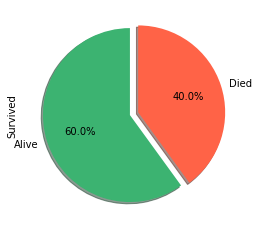

In [66]:
titanic_df['Survived'].value_counts().plot.pie(autopct='%1.1f%%', 
                                               labels=['Alive', 'Died'],
                                               shadow=True,
                                               startangle=90,
                                               explode=(0, 0.1),
                                               colors=['mediumseagreen', 'tomato'])

In [69]:
print(titanic_df.describe())
titanic_df['Survived'].mean()

       PassengerId  Survived    Pclass       Age       Fare
count     5.000000  5.000000  5.000000   5.00000   5.000000
mean      3.000000  0.600000  2.200000  31.20000  29.521660
std       1.581139  0.547723  1.095445   6.83374  30.510029
min       1.000000  0.000000  1.000000  22.00000   7.250000
25%       2.000000  0.000000  1.000000  26.00000   7.925000
50%       3.000000  1.000000  3.000000  35.00000   8.050000
75%       4.000000  1.000000  3.000000  35.00000  53.100000
max       5.000000  1.000000  3.000000  38.00000  71.283300


0.6

In [81]:
titanic_df.groupby(['Sex']).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [82]:
titanic_df.groupby(['Sex', 'Pclass']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        469.212766  0.968085  34.611765  0.553191  0.457447   
       2        443.105263  0.921053  28.722973  0.486842  0.605263   
       3        399.729167  0.500000  21.750000  0.895833  0.798611   
male   1        455.729508  0.368852  41.281386  0.311475  0.278689   
       2        447.962963  0.157407  30.740707  0.342593  0.222222   
       3        455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Sex    Pclass              
female 1       106.125798  
       2        21.970121  
       3        16.118810  
male   1        67.226127  
       2        19.741782  
       3        12.661633

In [85]:
titanic_df[titanic_df['Age'] < 18].groupby(['Sex', 'Pclass']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        525.375000  0.875000  14.125000  0.500000  0.875000   
       2        369.250000  1.000000   8.333333  0.583333  1.083333   
       3        374.942857  0.542857   8.428571  1.571429  1.057143   
male   1        526.500000  1.000000   8.230000  0.500000  2.000000   
       2        527.818182  0.818182   4.757273  0.727273  1.000000   
       3        437.953488  0.232558   9.963256  2.069767  1.000000   

                     Fare  
Sex    Pclass              
female 1       104.083337  
       2        26.241667  
       3        18.727977  
male   1       116.072900  
       2        25.659473  
       3        22.752523